# Classify hand-written digits with multi-layer DNN models 

We will be using the MNIST data set of handwritten digits.

The images which we will be working with are black and white images of size 28 x 28 pixels, or 784 pixels total. Our features will be the pixel values for each pixel. Either the pixel is "white" (blank with a 0), or there is some pixel value.

Two models will be built and compared the performance:
    1. 3 layers DNN (256, 256, 10) use tensorflow framework (graph session).
    2. 3 layers DNN (400, 400, 10) use keras.

In [1]:
import numpy as np
import tensorflow as tf

C:\Users\HUI-YING LU\Anaconda3\envs\DL_AZ\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
type(mnist.train.images)

numpy.ndarray

In [6]:
mnist.train.images.shape

(55000, 784)

In [7]:
sample = mnist.train.images[2034].reshape(28,28)
sample

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

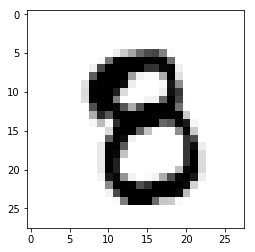

In [10]:
plt.imshow(sample, cmap='Greys')

# Method 1: Tensorflow framework - graph session

In [11]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [12]:
n_classes = 10
n_samples = mnist.train.num_examples
n_samples

55000

In [13]:
n_input = 784

In [14]:
n_hidden_1 = 256
n_hidden_2 = 256

In [15]:
def multilayer_perceptron(x, weights, biases):
    '''
    x: Placeholder for the Data Input
    weights: Dict of weights
    biases: Dict of biases   
    '''
    # First Hidden Layer: RELU activation
    # X * W + B
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # RELU(X * W + B) -> f(x) = max(0, x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden Layer:
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # RELU(X * W + B) -> f(x) = max(0, x)
    layer_2 = tf.nn.relu(layer_2)
    
    # Out Layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

In [16]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [17]:
weights

{'h1': <tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>}

In [18]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [19]:
x = tf.placeholder('float', [None, n_input])

In [20]:
y = tf.placeholder('float', [None, n_classes])

In [21]:
pred = multilayer_perceptron(x, weights, biases)

In [22]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



# Training the Model

In [23]:
t = mnist.train.next_batch(1)

In [24]:
Xsamp, ysamp = t

In [25]:
Xsamp.shape

(1, 784)

In [26]:
ysamp.shape

(1, 10)

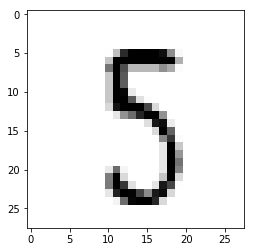

In [27]:
plt.imshow(Xsamp.reshape(28,28),cmap="Greys")

In [28]:
ysamp

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [29]:
sess = tf.InteractiveSession()

In [30]:
init = tf.global_variables_initializer()

In [31]:
sess.run(init)

In [32]:
# 15 loops
for epoch in range(training_epochs):
    
    # Cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
        
        avg_cost += c/total_batch
    
    print("Epoch {} cost {:.4f}".format(epoch+1, avg_cost))

print("Model has completed {} Epoch of training".format(training_epochs))

Epoch 1 cost 160.5877
Epoch 2 cost 41.5160
Epoch 3 cost 25.9090
Epoch 4 cost 18.0947
Epoch 5 cost 13.2227
Epoch 6 cost 9.7293
Epoch 7 cost 7.1716
Epoch 8 cost 5.2990
Epoch 9 cost 3.9704
Epoch 10 cost 2.9560
Epoch 11 cost 2.2535
Epoch 12 cost 1.6218
Epoch 13 cost 1.3991
Epoch 14 cost 1.0538
Epoch 15 cost 0.8454
Model has completed 15 Epoch of training


# Model Evaluations

In [33]:
print(pred.shape)

(?, 10)


In [34]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [35]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [36]:
correct_predictions = tf.cast(correct_predictions, 'float')

In [37]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [38]:
accuracy = tf.reduce_mean(correct_predictions)

In [39]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [40]:
accuracy.eval({x: mnist.test.images, y: mnist.test.labels})

0.9427

# Method 2: Keras

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [42]:
X_train, y_train = mnist.train.images, mnist.train.labels
X_test, y_test = mnist.test.images, mnist.test.labels

In [43]:
model = Sequential()
# Use the formular: # of hidden units ~ (input_dim + out_dim)/2
model.add(Dense(400, kernel_initializer='uniform', activation='relu', input_dim=n_input))
model.add(Dense(400, kernel_initializer='uniform', activation='relu'))
model.add(Dense(n_classes, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=100)

Epoch 1/15
55000/55000 [==============================] - 16s 285us/step - loss: 0.2767 - acc: 0.9190
Epoch 2/15
55000/55000 [==============================] - 15s 279us/step - loss: 0.1016 - acc: 0.9691
Epoch 3/15
55000/55000 [==============================] - 15s 281us/step - loss: 0.0651 - acc: 0.9799
Epoch 4/15
55000/55000 [==============================] - 15s 280us/step - loss: 0.0463 - acc: 0.9855
Epoch 5/15
55000/55000 [==============================] - 15s 281us/step - loss: 0.0344 - acc: 0.9890
Epoch 6/15
55000/55000 [==============================] - 16s 283us/step - loss: 0.0267 - acc: 0.9912
Epoch 7/15
55000/55000 [==============================] - 15s 281us/step - loss: 0.0223 - acc: 0.9925
Epoch 8/15
55000/55000 [==============================] - 15s 281us/step - loss: 0.0189 - acc: 0.9938
Epoch 9/15
55000/55000 [==============================] - 16s 285us/step - loss: 0.0157 - acc: 0.9948
Epoch 10/15
55000/55000 [==============================] - 16s 293us/step - loss: 

In [44]:
y_pred = model.predict(X_test)

In [45]:
correct_pred = np.equal(np.argmax(y_pred, axis=1), np.argmax(y_test, axis=1))

In [46]:
np.mean(correct_pred)

0.9825

In [47]:
y_test1 = np.argmax(y_test, axis=1)
y_test1.shape

(10000,)

In [48]:
y_pred1 = np.argmax(y_pred, axis=1)
y_pred1.shape

(10000,)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print(classification_report(y_test1, y_pred1))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.99      0.98      0.98      1032
          3       0.97      0.99      0.98      1010
          4       0.97      0.98      0.97       982
          5       0.98      0.98      0.98       892
          6       0.99      0.97      0.98       958
          7       0.99      0.98      0.98      1028
          8       0.99      0.97      0.98       974
          9       0.97      0.98      0.98      1009

avg / total       0.98      0.98      0.98     10000



In [51]:
preds = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 151us/step


In [52]:
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))


Loss = 0.08541648435511674
Test Accuracy = 0.9825


# Compare method 1 and method 2: method 2 - 3 layers DNN (400, 400, 10) performs better.  We use (input_dim+out_dim)/2 as the number for hidden layer. Looks like that works better.